# MODEL

In [3]:
# Kütüphaneler

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV , LassoCV

In [5]:
# Veri seti

df = pd.read_csv("C:\python_py\Makine Öğrenmesi-2\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division" , "NewLeague"]])
y = df["Salary"]
x___ = df.drop(["Salary" , "League" , "Division" , "NewLeague"] , axis=1).astype("float64")
x = pd.concat([x___ , dms[["League_N" , "Division_W" , "NewLeague_N"]]] , axis=1)
x_train , x_test , y_train , y_Test = train_test_split(x , y , test_size=0.25 , random_state=42)

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [8]:
df.shape

(263, 20)

In [9]:
# Modeli oluşturalım

lasso_model = Lasso().fit(x_train , y_train)

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [14]:
# Modelimizin içinden ß'ları alalım

print("b0 =" , lasso_model.intercept_)  # b0

print("b1,b2,b3 ... =" , lasso_model.coef_ )  # b1 , b2 , b3 ....

b0 = -5.587450677336506
b1,b2,b3 ... = [-1.74875691e+00  8.59204135e+00  6.67993798e+00 -3.06715333e+00
 -1.91843070e+00  5.32372890e+00  8.39184117e+00 -1.63172447e-01
 -8.22311277e-02 -3.93602861e-01  1.71118530e+00  6.55730545e-01
 -6.48379405e-01  2.59815358e-01  2.73041157e-01 -4.41440454e-01
  8.54474011e+01 -9.59701213e+01 -2.13086605e+01]


In [20]:
# Ridge'de olduğu gibi farklı alfa (lambda) değerlerine karşılık katsayıları gözlemleyelim

lasso = Lasso()
coefs = []
lambdalar = np.random.randint(0,1000,100)

for a in lambdalar:
    lasso.set_params(alpha = a)     # Parametre set etme işlmei uyguladık. a'ları alpha olarak set ettik. a'lar da lambdalar'dan geliyordu.
    lasso.fit(x_train , y_train)    # lamdalar'da yakaladığı her bir a değeri için parametreyi yukarıda set edip bu a değerine göre modeli kurduk.
    coefs.append(lasso.coef_)       # Bu modelde oluştruduğun katsayıları coefs dizisine ekle.

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.021e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Py

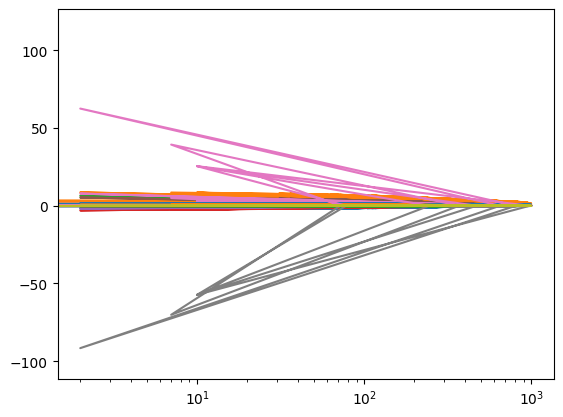

In [21]:
ax = plt.gca()
ax.plot(lambdalar, coefs)
ax.set_xscale("log")    # katsayıları görebilmek için x ekseninde bir ayarlama yapmamız gerkiyor

# x-ekseninde alfalar (lambdalar)
# y-ekseninde bu alfalara (lambdalara) karşılık ne şekilde değişeceği bilgisi yer alıyor.

# TAHMİN

In [24]:
lasso_model.predict(x_train)[0:10]

array([ 377.26270596,  786.51524513,  495.14140718,  117.19492966,
        429.04228506, 1002.11334796,  154.15381011,  359.68989378,
        484.56926344,  915.91820524])

In [25]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [27]:
# Test seti için hata oranımız

y_pred = lasso_model.predict(x_test)

np.sqrt(mean_squared_error(y_Test , y_pred))

356.0975884554034

In [29]:
# Daha önce bakmadığımız r2 skoruna bakalım (modelin açıklanabilirliğini ifade eder. Yani bağımsız değişkenler bağımlı değişkenlerdeki değişikliğin yüzde kaçını açıklıyor.)
# Bakmamız gereken skorlardan biri (Burada %41'ini açıklamış)

r2_score(y_Test , y_pred)

0.41422798132366156

# MODEL TUNİNG

In [35]:
lasso_cv_model = LassoCV(alphas=lambdalar , cv=10 , max_iter=100000).fit(x_train , y_train)

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5936532.689312935, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_de

In [36]:
# Bize önerdiği optimum alfa (lambda) değeri

lasso_cv_model.alpha_

178

In [37]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(x_train , y_train)

# Aşağıdaki işlemin aynısı aslında:

# lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(x_train , y_train)

In [38]:
# Final modelimizin test hata oranı:

y_pred = lasso_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_Test , y_pred))        # LassoCV'ye alphas vermediğimde 373 çıkmıştı

362.74266248815906

In [41]:
# Katsayıların sıfırlanması hakkında

pd.Series(lasso_tuned.coef_ , index=x_train.columns)        # Katsayısı 0 olanların maaşa (bağımlı değişkene) bir etkisi yok

AtBat         -1.172478
Hits           5.648264
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.872762
Years          0.000000
CAtBat        -0.167852
CHits          0.217349
CHmRun        -0.000000
CRuns          1.078060
CRBI           0.474480
CWalks        -0.226260
PutOuts        0.273223
Assists        0.180843
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64